# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- The Ethereum Merge Is Successful – How Will It Impact Traders and the Global Crypto Market?.  After months of speculation, the long-awaited Ethereum (ETH) merge finally took place on September 15, 2022. The merge saw the popular blockchain network move from its hardware-based PoW (proof-of-work) model to the more environmental-friendly PoS (proof-of-stake) model. The merger will see the Ethereum blockchain reduce its carbon footprint by 99.9%, resulting in faster transactions and [&#8230;]The post The Ethereum Merge Is Successful – How Will It Impact Traders and the Global Crypto Market? appeared first on The Daily Hodl. ... [| Skaityti daugiau](https://dailyhodl.com/2022/10/01/the-ethereum-merge-is-successful-how-will-it-impact-traders-and-the-global-crypto-market/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Scientists watching Omicron's next COVID curveball closely | CBC News.  Omicron continues to mutate and produce new strains that have been shown to better evade immunity and have the potential to drive new COVID waves. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/omicron-subvariants-immune-escape-bivalent-vaccines-1.6601218) 

### Kainų kaita pandemijos metu

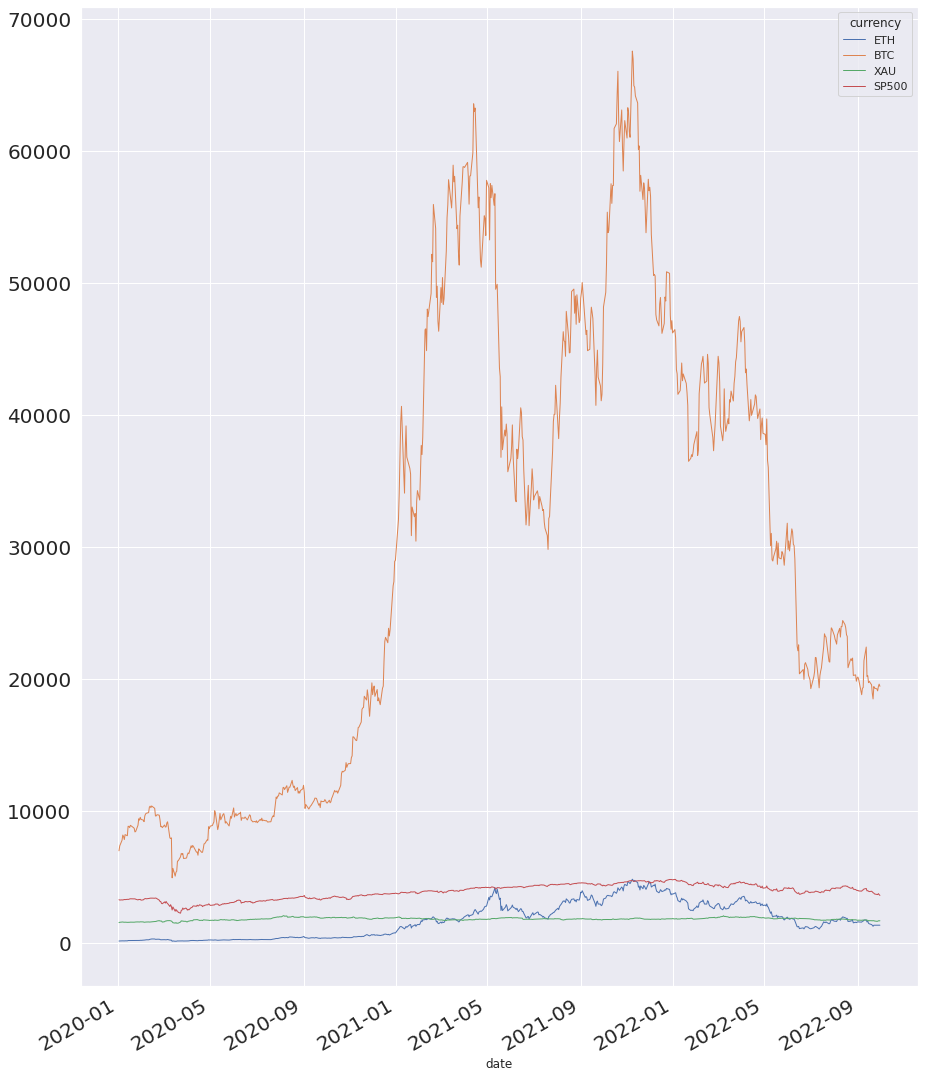

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.898277,0.251066,0.914360
BTC,0.898277,1.000000,0.221269,0.844112
XAU,0.251066,0.221269,1.000000,0.358154
SP500,0.914360,0.844112,0.358154,1.000000


In [8]:
#hide ### Koreliacijos matrica.

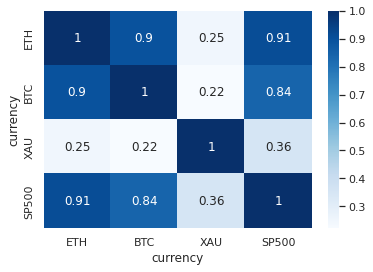

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')